In [3]:
# !pip install numpy
# !pip install ucimlrepo
# !pip install pandas
# !pip install matplotlib

import math
import pandas
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [4]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets
X["num"] = y

## 1. Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?

In [5]:
amounts = {}
for x in X["num"].tolist():
    if x not in amounts:
        amounts[x] = 0
    amounts[x] += 1
print(amounts)

for amount in amounts:
    print("{}: {:.2f}%".format(amount, amounts[amount]/3.03))

{0: 164, 2: 36, 1: 55, 3: 35, 4: 13}
0: 54.13%
2: 11.88%
1: 18.15%
3: 11.55%
4: 4.29%


Nie, nie jest zrównoważony. Spośród 303 rekordów, 164(ponad połowa) odnosi się do jednej grupy. 
Bez uwzględnienia tej grupy, zbiór nadal nie byłby zrównoważony, ponieważ grupa 1 zawiera około dwa razy więcej przypadków co grupy 2 i 3, oraz przewyższa grupę 4 około czterokrotnie.

## 2. Jakie są średnie i odchylenia cech liczbowych?

In [7]:
# wybór kolumn z wartościami liczbowymi
numerical_columns = X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num']]

# wyliczanie średnich wartości dla każdej kolumny
mean = numerical_columns.mean()
print("Średnie: ")
print(mean)

# wyliczanie odchyleń standardowych dla każdej kolumny
standard_deviation = numerical_columns.std()
print("Odchylenie Standardowe: ")
print(standard_deviation)

Średnie: 
age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
ca            0.672241
num           0.937294
dtype: float64
Odchylenie Standardowe: 
age          9.038662
trestbps    17.599748
chol        51.776918
thalach     22.875003
oldpeak      1.161075
ca           0.937438
num          1.228536
dtype: float64


## 3. Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

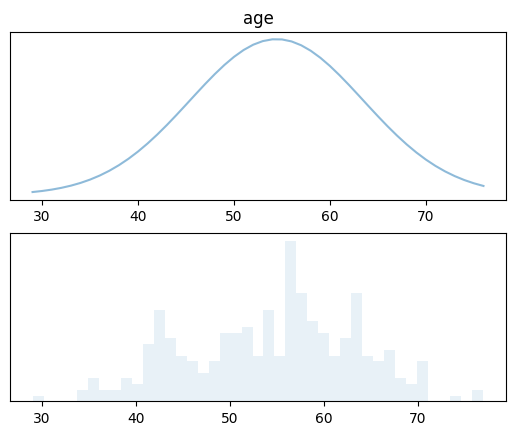

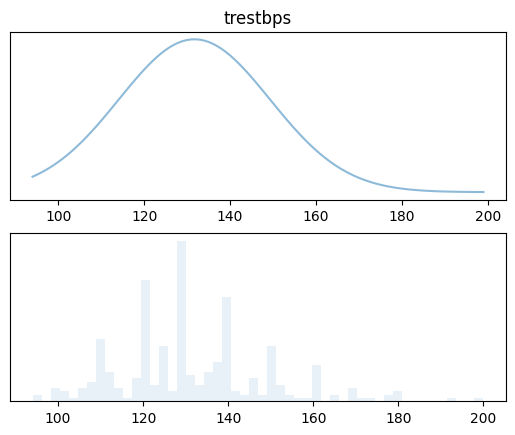

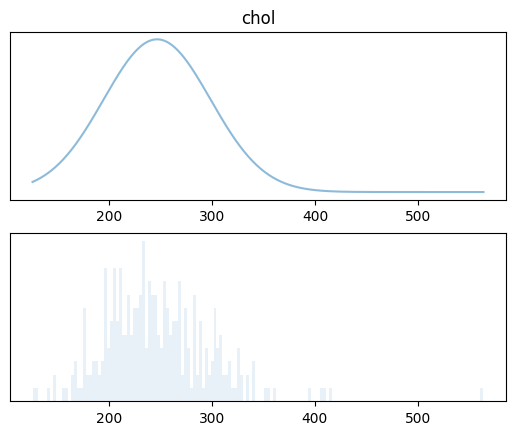

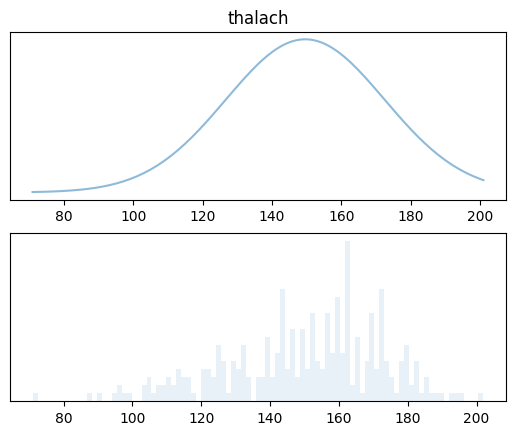

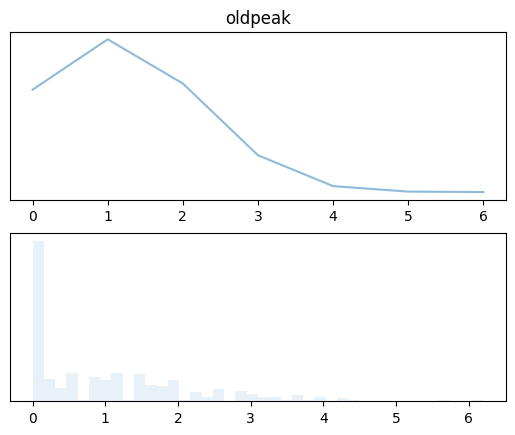

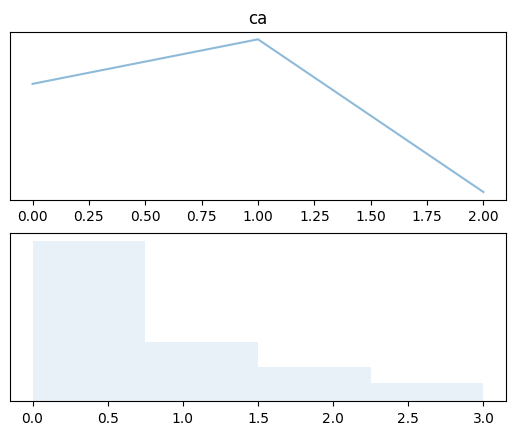

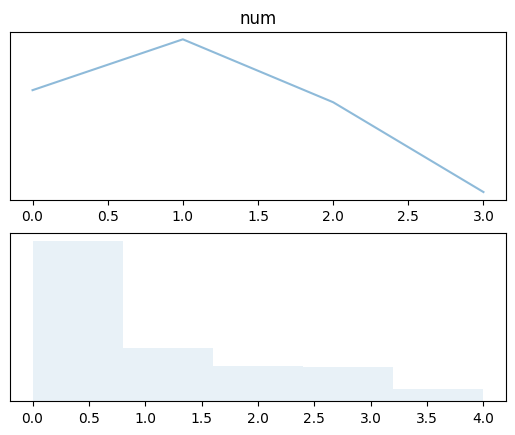

In [28]:
from scipy.stats import norm
import numpy as np

for x in numerical_columns:
    x_axis = np.arange(numerical_columns[x].min(), numerical_columns[x].max(), 1)
    figure, axis = plt.subplots(2)
    axis[0].set_title(x)

    axis[0].plot(x_axis, norm.pdf(x_axis, mean[x], standard_deviation[x]), label='distribution', alpha=0.5)
    axis[0].yaxis.set_visible(False)
    axis[1].hist(numerical_columns[x], bins= numerical_columns[x].nunique(), alpha = 0.1, label='values')
    axis[1].yaxis.set_visible(False)

    # plt.plot(x_axis, norm.pdf(x_axis, mean[x], standard_deviation[x]), label='distribution', alpha=0.5)
    # plt.hist(numerical_columns[x], bins= numerical_columns[x].nunique(), alpha = 0.1, label='values')
    plt.show()

Dane jakie możnaby określić zbliżonymi do rozkładu normalnego to 'age', 'trespbs', 'chol' oraz 'thalach'

## 4. Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

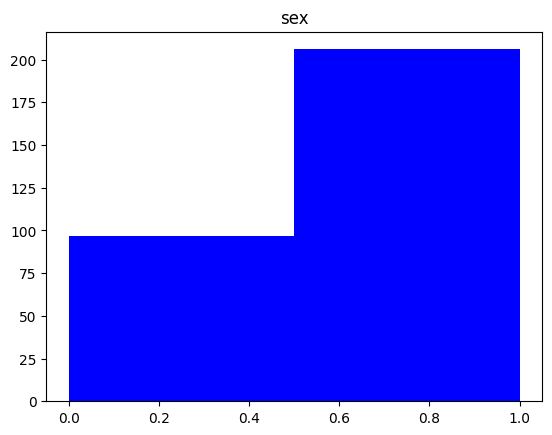

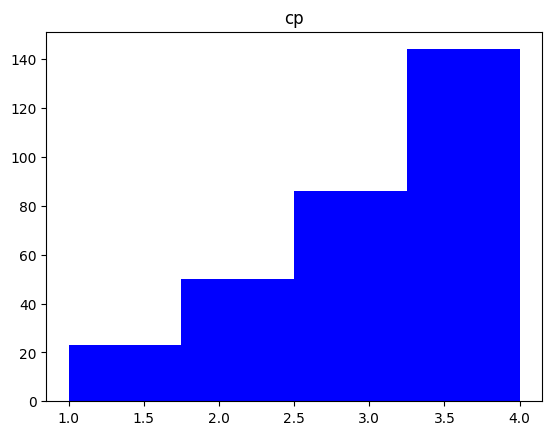

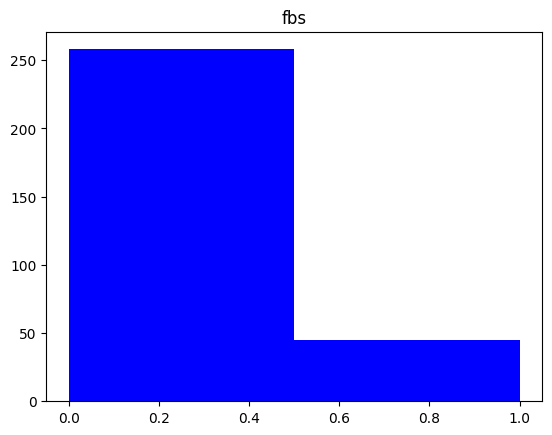

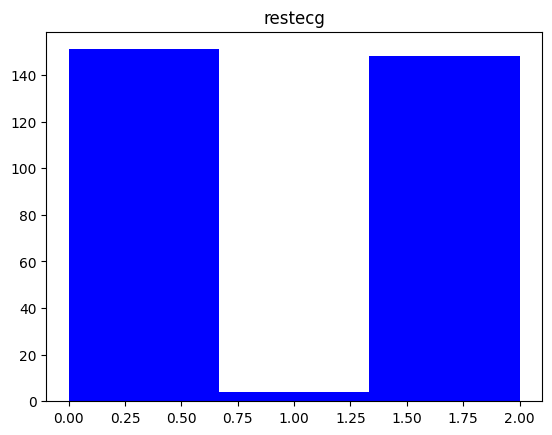

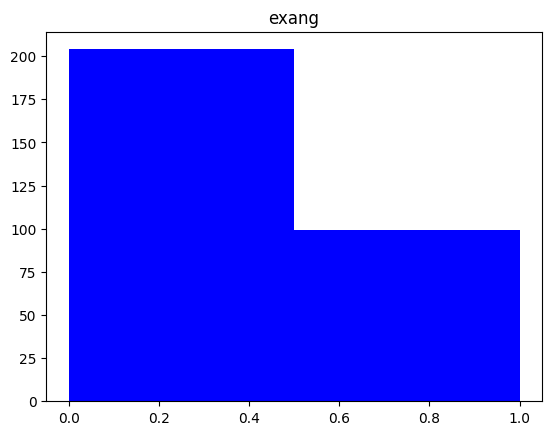

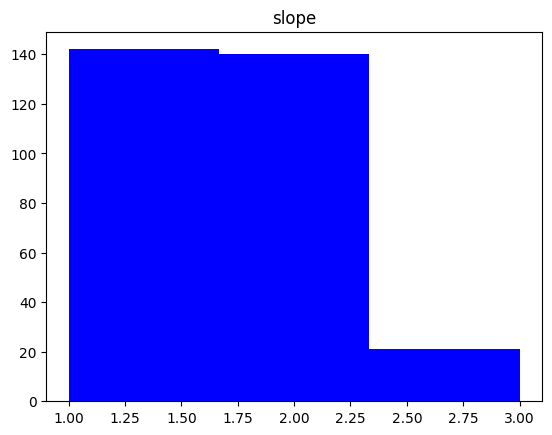

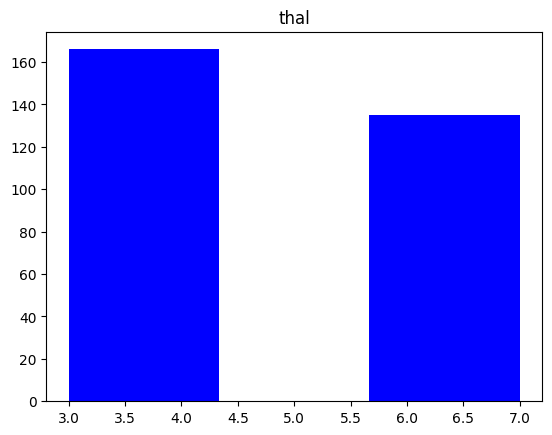

In [17]:
# wybór kolumn z wartościami liczbowymi
categorical_columns = X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]

for x in categorical_columns:
    plt.hist(categorical_columns[x], bins = categorical_columns[x].nunique(), color='b')
    plt.title(x)
    plt.show()

Zmienne kategoryczne rozkładają się nierównomiernie, są kolumny takie jak 'thal', 'restecg' i 'slope', któe są bliskie rozkładowi równomiernego, jednakże mają jedną wartość, która występuje niezwykle rzadko ale przez to nie ma rozkładu normalnego

## 5. Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?

In [18]:
missing_values = X.isna().any()
missing_values

# X['ca'].fillna(mean['ca'], inplace=True)

# most_common_thal = X['thal'].value_counts()
# most_common_value = most_common_thal.idxmax()

# X['thal'].fillna(most_common_value, inplace=True)

# missing_values = X.isna().any()
# missing_values

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num         False
dtype: bool

W wartościach 'ca' oraz 'thal' występuje kilka brakujących cech, ca jako wartość liczbowa może zostać zamieniona średnią wartością z tej kolumny, jednakże 'thal' musi przyjąć wartość najczęściej występującej wartości, aby zachować sens danych.

In [19]:
matrix = X.values
matrix

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.],
       [38.,  1.,  3., ..., nan,  3.,  0.]])